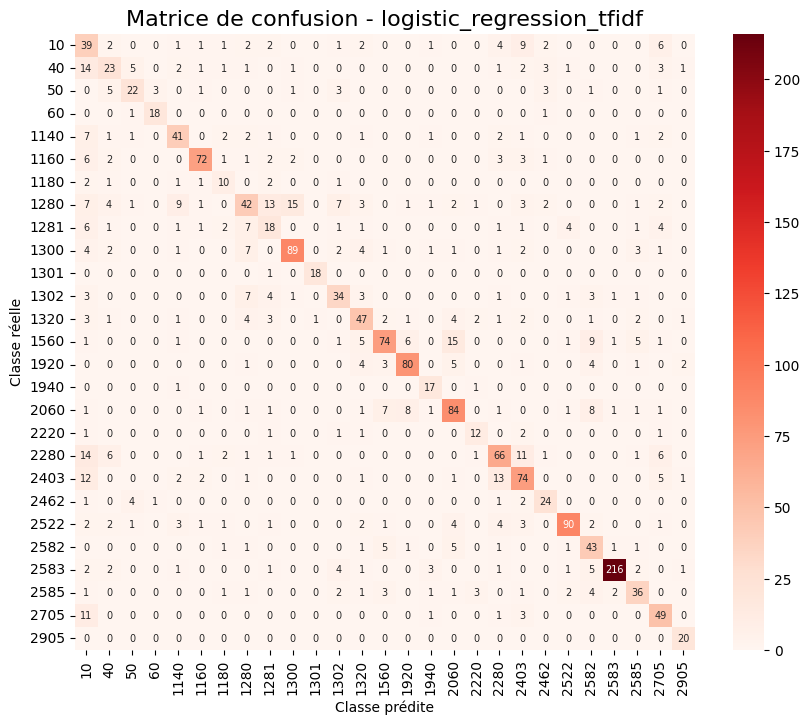

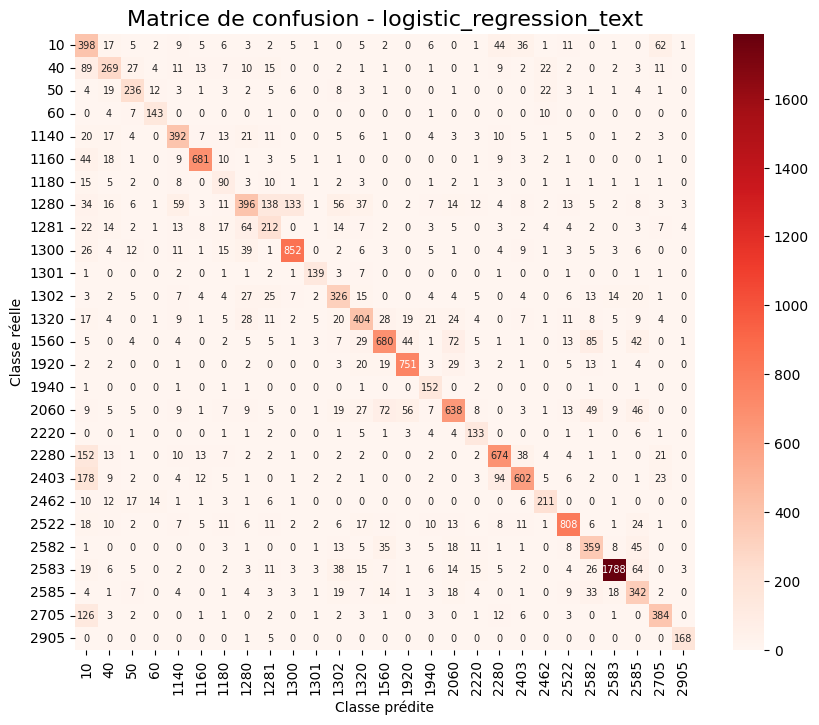

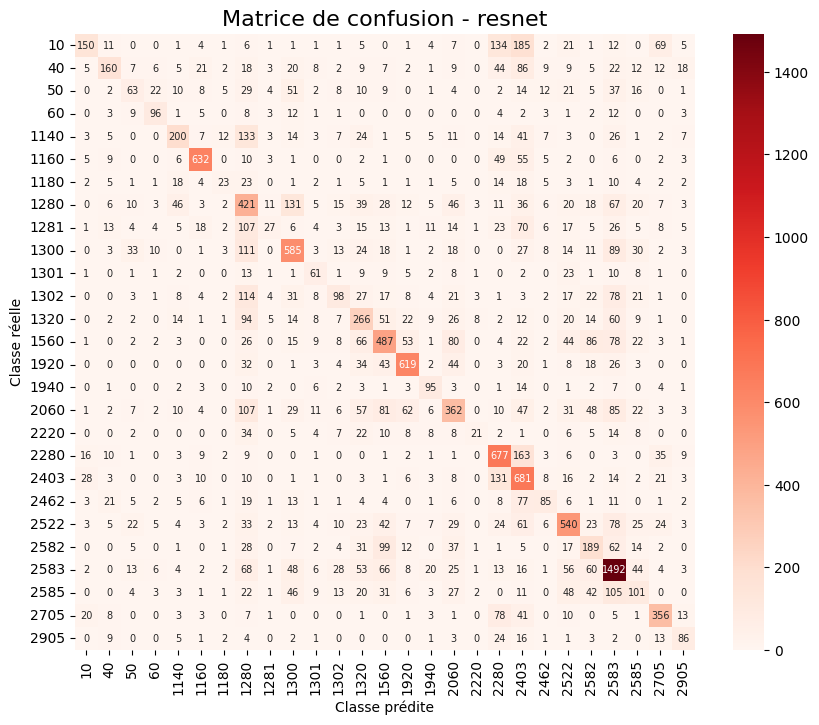

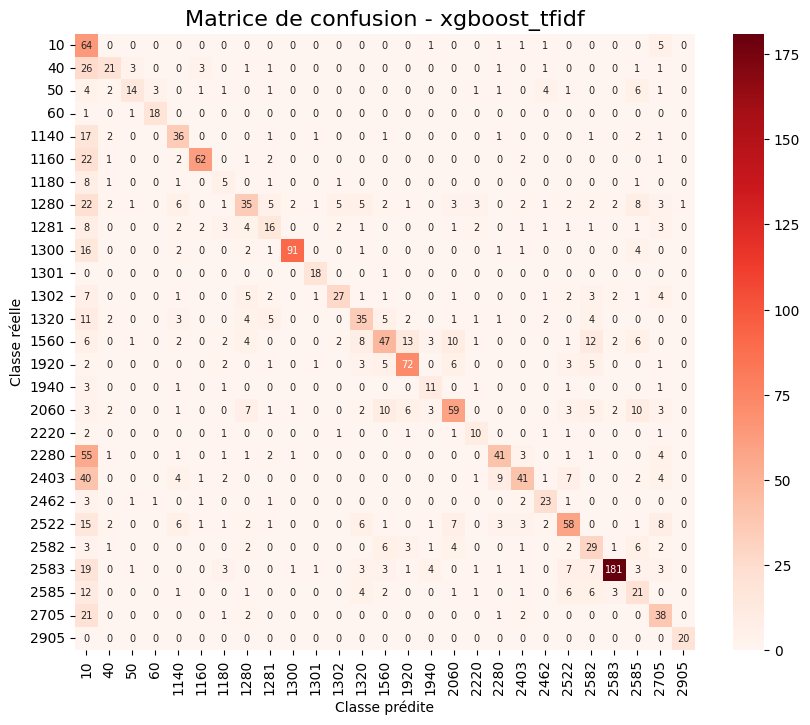

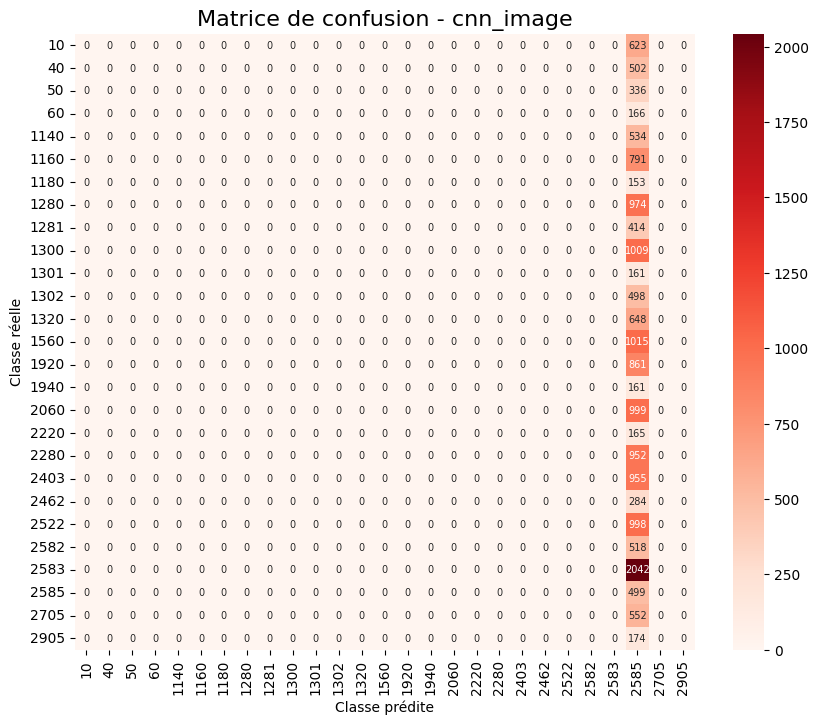

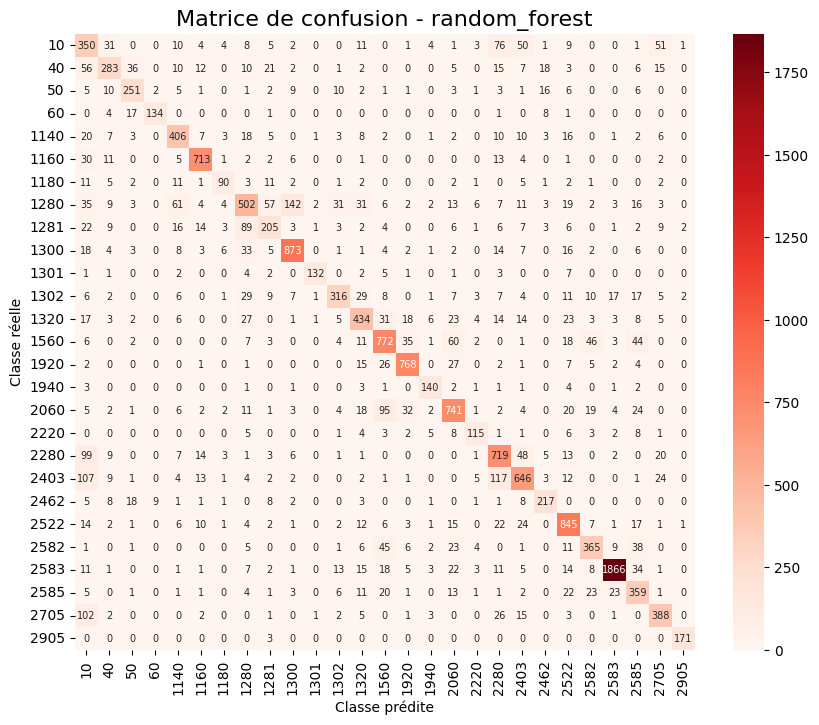

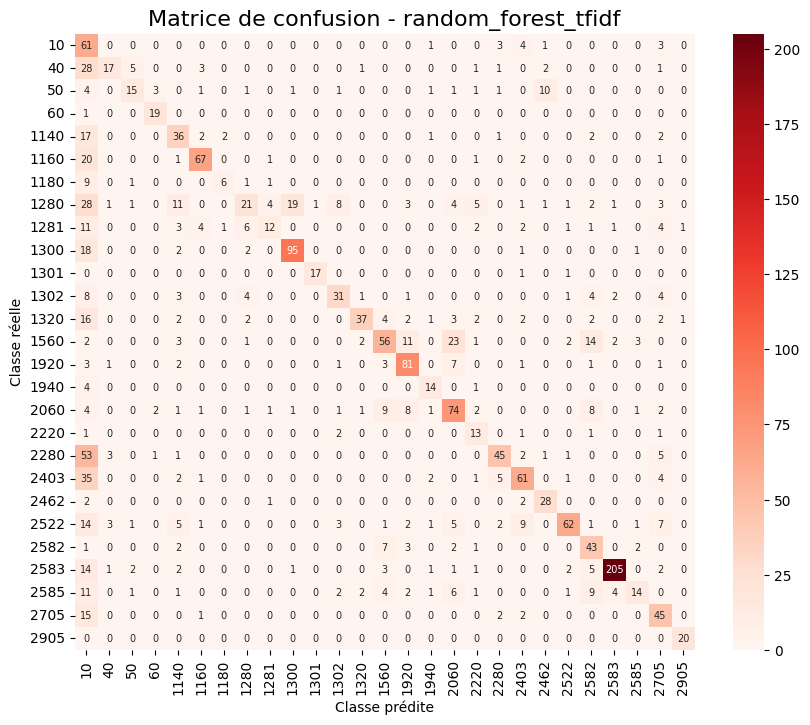

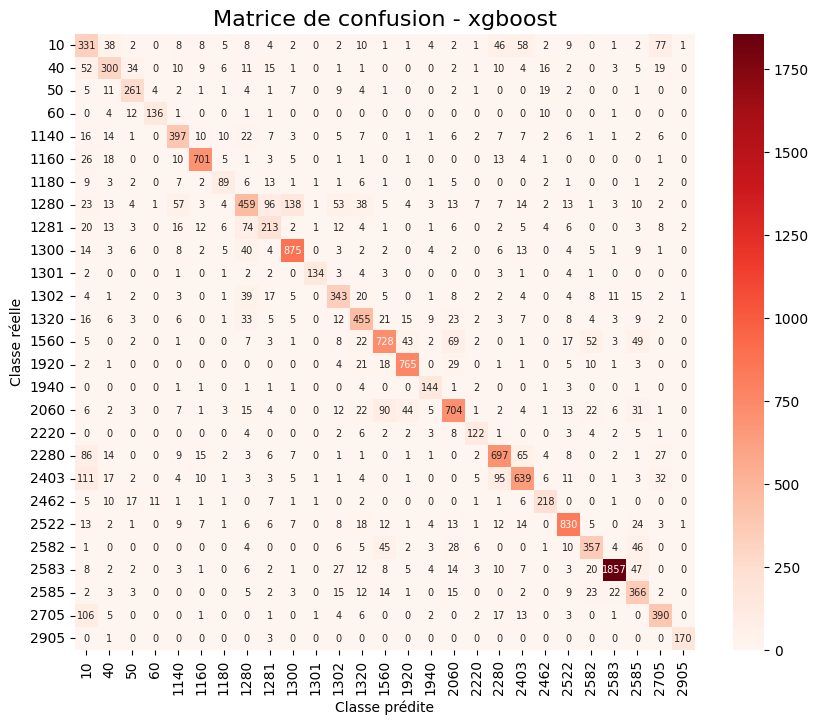

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Chemin vers le dossier contenant les fichiers
folder_path = Path('../models')

# Chercher tous les fichiers *_confusion_matrix.txt
files = list(folder_path.glob('*_confusion_matrix.txt'))

# Charger les vrais labels au format dataframe
labels = pd.read_csv('../data/prdtypecode_labels.csv')['prdtypecode']

for file in files:
    model_name = file.stem.replace('_confusion_matrix', '')

    with open(file, 'r') as f:
        content = f.read()

    # Nettoyer le texte : enlever crochets et retours à la ligne
    content = content.replace('\n', ' ').replace('[', '').replace(']', '')

    # Convertir en liste d'entiers
    numbers = [int(x) for x in content.split() if x.strip() != '']

    # Détecter la taille de la matrice (nombre de lignes = racine carrée du nombre total)
    # Si ce n'est pas carré, on peut essayer de reconstruire selon les lignes originales
    # Ici on suppose que la matrice est carrée
    size = int(np.sqrt(len(numbers)))
    matrix = np.array(numbers).reshape(size, size)

    # Affichage heatmap
    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Reds', annot_kws={'size': 7}, yticklabels=labels, xticklabels=labels)
    plt.title(f'Matrice de confusion - {model_name}', fontsize=16)
    plt.xlabel('Classe prédite')
    plt.ylabel('Classe réelle')

    # Export the heatmap as an image (save before show to avoid blank images)
    fig.savefig(f'../streamlit_app/assets/heatmaps/{model_name}_confusion_matrix.png', bbox_inches='tight')
    plt.show()
    plt.close(fig) # Close the figure to free memory and ensure clean state
